Tutorial 6: Hyper Pipeline
==========================

To end, lets illustrate the use of hyper-mode in a pipeline.

You can find many more example pipelines in the folder 'autolens_workspace/advanced/hyper'.

In [1]:
from autoconf import conf
import autofit as af
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/autolens_workspace


Use this path to explicitly set the config path and output path.

In [2]:
conf.instance = conf.Config(
    config_path=f"{workspace_path}/howtolens/config",
    output_path=f"{workspace_path}/howtolens/output",
)

 AUTOLENS + DATA SETUP 

In [3]:
import autolens as al
import autolens.plot as aplt

We'll use strong lensing data, where:

 - The lens galaxy's light is an _EllipticalSersic_.
 - The lens galaxy's _MassProfile_ is an _EllipticalIsothermal_.
 - The source galaxy's _LightProfile_ is four _EllipticalSersic_'s.

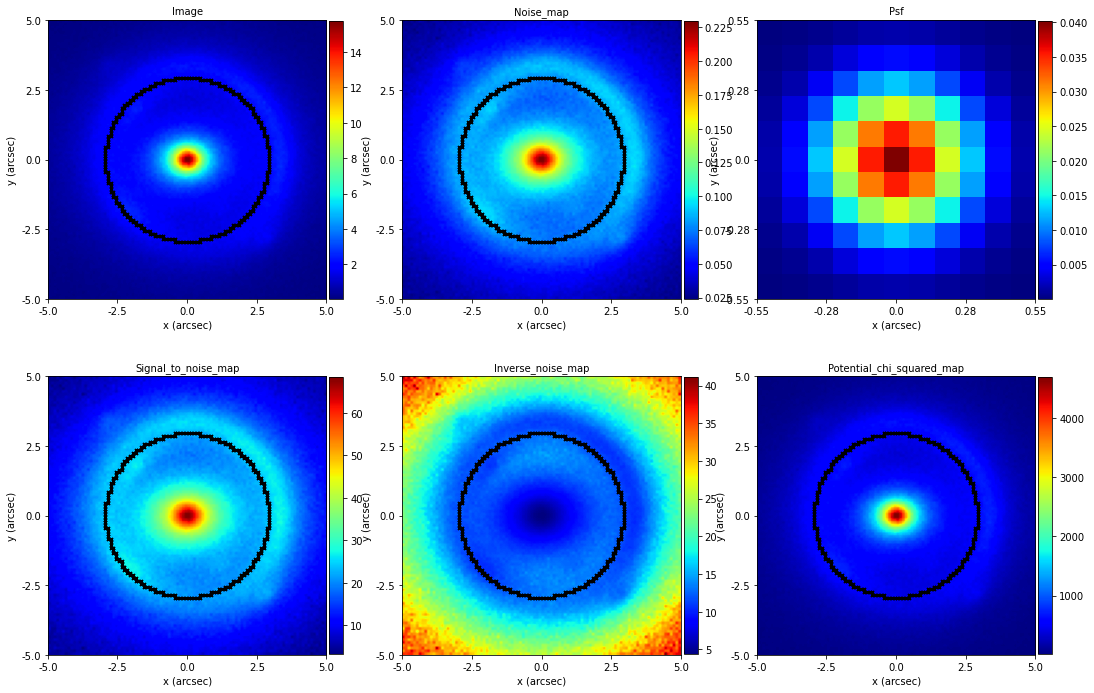

In [4]:
from howtolens.simulators.chapter_5 import (
    lens_sersic_sie__source_sersic_x4,
)

dataset_type = "chapter_5"
dataset_name = "lens_sersic_sie__source_sersic_x4"
dataset_path = f"{workspace_path}/howtolens/dataset/{dataset_type}/{dataset_name}"

imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise_map.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.1,
)

mask = al.Mask.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, radius=3.0
)

aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask)

__Settings__

The *PhaseSettingsImaging* describe how the model is fitted to the data in the log likelihood function. We discussed
these in chapter 2, and a full description of all settings can be found in the example script:

    'autolens_workspace/examples/model/customize/settings.py'.

The settings chosen here are applied to all phases in the pipeline.

In [5]:
settings = al.PhaseSettingsImaging(grid_class=al.Grid, sub_size=2)

__Pipeline_Setup_And_Tagging__:

The setup module customizes the behaviour of a pipeline. Hyper-fitting brings with it the following setup:

 - If hyper-galaxies are used to scale the noise in each component of the image (default True)
 - If the level of background noise is modeled throughout the pipeline (default True)
 - If the background sky is modeled throughout the pipeline (default False)
    
Each of these features uses their own non-linear search in extended 'hyper phases', which are also specified in the
_PipelineSetup-.

In [6]:
hyper_galaxies_search = af.DynestyStatic(n_live_points=100, evidence_tolerance=0.8)
inversion_search = af.DynestyStatic(n_live_points=30, evidence_tolerance=0.8)
hyper_combined_search = af.DynestyStatic(n_live_points=50, evidence_tolerance=0.8)

setup = al.PipelineSetup(
    hyper_galaxies=True,
    hyper_background_noise=True,
    hyper_image_sky=False,  # <- By default this feature is off, as it rarely changes the lens model.
    hyper_galaxies_search=hyper_galaxies_search,
    inversion_search=inversion_search,
    hyper_combined_search=hyper_combined_search,
    pixelization=al.pix.VoronoiBrightnessImage,
    regularization=al.reg.AdaptiveBrightness,
    folders=["howtolens", "c5_t6_hyper"],
)
# %%
"""
Lets import the pipeline and run it.
"""

'\nLets import the pipeline and run it.\n'

In [14]:
from howtolens.chapter_5_hyper_mode import tutorial_6_hyper_pipeline

pipeline_hyper = tutorial_6_hyper_pipeline.make_pipeline(setup=setup, settings=settings)

# Uncomment to run.
# pipeline_hyper.run(dataset=imaging, mask=mask)


ModuleNotFoundError: No module named 'howtolens.chapter_5_hyper_mode'